In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("matplotlb_style.txt")

In [2]:
file_path_excel = 'RVS_results.xlsx'

# Read rows 2 to 12 (Excel rows are 1-indexed, so in pandas it's 1 to 11)
dataframe1 = pd.read_excel(file_path_excel, skiprows=1, nrows=10, sheet_name=1)

In [3]:
dataframe1.head(3)

,Model,Quality value,IC_size,IC,Blur_size,Blur,LC_size,LC
0,UNet,0,52,82.17,41,78.82,15,68.31
1,UNet,1,148,90.96,159,91.22,185,90.33
2,FR-UNet,0,52,80.62,41,76.93,15,63.77


In [4]:
# Calculating standard deviation for the size of each IC, Blur, and LC
std_devs = dataframe1.groupby(['Quality value'])[['IC', 'Blur', 'LC']].std().reset_index()

# Merging the sampled data with their corresponding standard deviations
merged_df = pd.merge(dataframe1, std_devs, on=['Quality value'], suffixes=('', '_std'))

# Melting the dataframe for plotting
melted_df = merged_df.melt(id_vars=['Model', 'Quality value'], 
                           value_vars=['IC', 'Blur', 'LC'], 
                           var_name='Quality', 
                           value_name='Dice')


# Melting the dataframe for standard deviations
std_melted_df = merged_df.melt(id_vars=['Model', 'Quality value'], 
                               value_vars=['IC_std', 'Blur_std', 'LC_std'], 
                               var_name='Metric_std', 
                               value_name='Error')


# Adjusting the Metric_std column to match the Metric column
std_melted_df['Metric_std'] = std_melted_df['Metric_std'].str.replace('_std', '')

# Merging the value and error dataframes
final_df = pd.merge(melted_df, std_melted_df, left_on=['Model', 'Quality value', 'Quality'], 
                    right_on=['Model', 'Quality value', 'Metric_std'])


In [5]:
final_df

,Model,Quality value,Quality,Dice,Metric_std,Error
0,UNet,0,IC,82.17,IC,4.374251
1,FR-UNet,0,IC,80.62,IC,4.374251
2,MA-Net,0,IC,82.44,IC,4.374251
3,SA-UNet,0,IC,79.16,IC,4.374251
4,W-Net,0,IC,71.77,IC,4.374251
5,UNet,1,IC,90.96,IC,2.564092
6,FR-UNet,1,IC,91.37,IC,2.564092
7,MA-Net,1,IC,90.70,IC,2.564092
8,SA-UNet,1,IC,87.15,IC,2.564092
9,W-Net,1,IC,85.73,IC,2.564092


### Sheet 2

In [6]:
# Read rows 26 to 46 (Excel rows are 1-indexed, so in pandas it's 15 to 25)
dataframe2 = pd.read_excel(file_path_excel, skiprows=25, nrows=20, sheet_name=1, usecols=['Model','Quality Score', 'Size', 'DSC'])

In [7]:
dataframe2.head(3)

,Model,Quality Score,Size,DSC
0,UNet,0,15,68.31
1,UNet,1,11,82.80
2,UNet,2,41,88.62


In [8]:
df_melted = dataframe2.melt(id_vars=["Model", "Quality Score"], value_vars=["DSC"], var_name="Score", value_name="Dice")


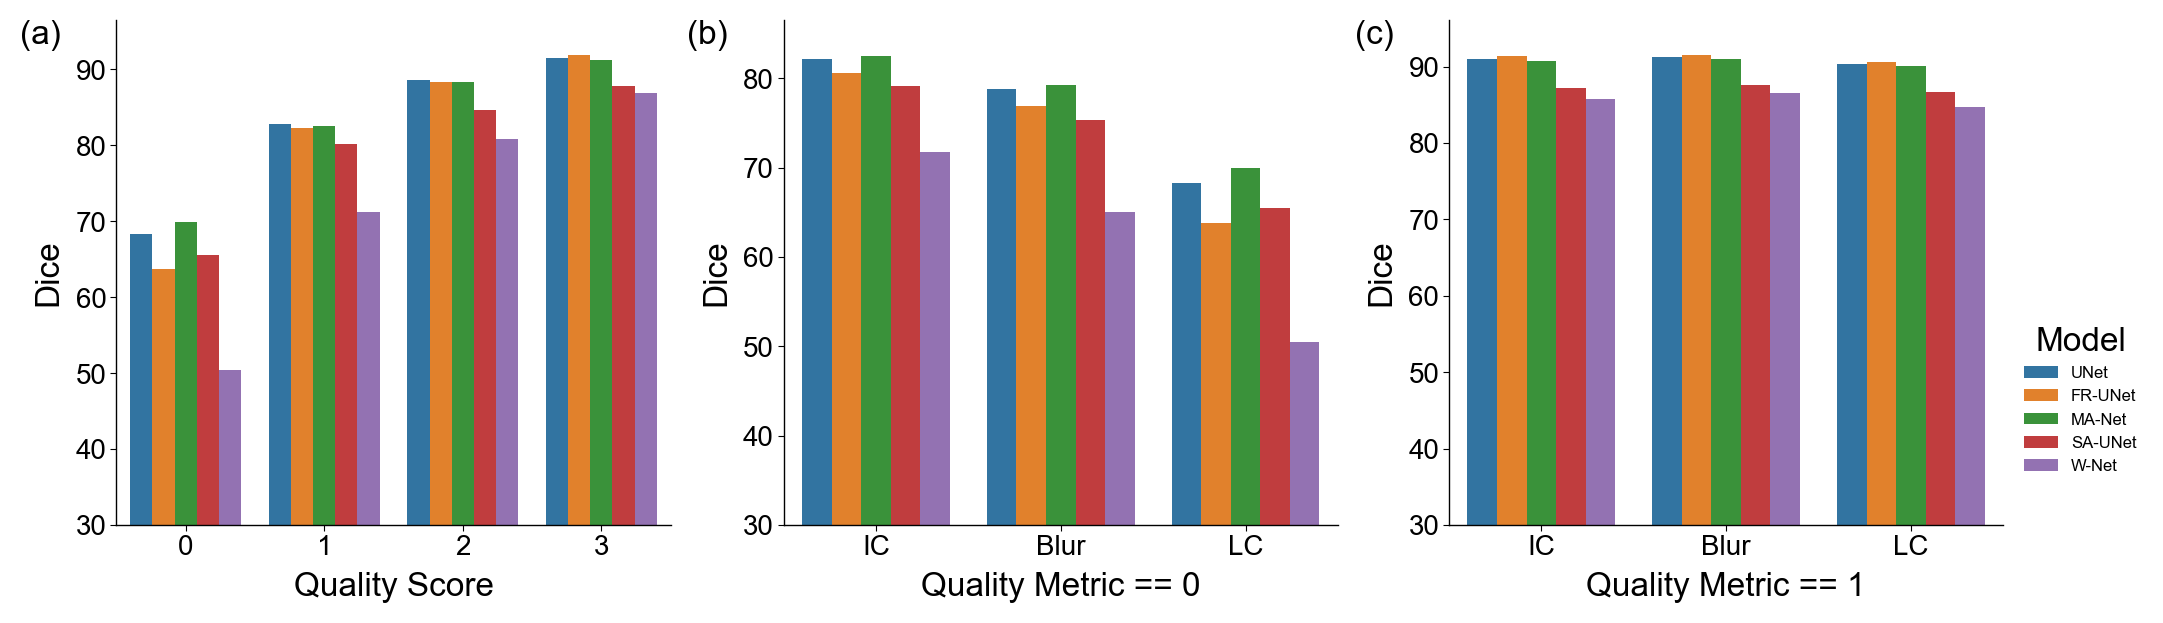

In [31]:
# Plotting
import numpy as np
# Function to remove top and right spines
def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
# Create a 1x4 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(10,3))  # Share Y-axis
palette = sns.color_palette("tab10", as_cmap=False)

# capsize=smaller_capsize, errwidth=1.5
sns.barplot(x='Quality Score', y='Dice', hue='Model',
              data=df_melted,
              ax=axes[0], palette=palette,
              capsize=.2, errwidth=1.5,
             )
sns.barplot(x='Quality', y='Dice', hue='Model', 
            data=final_df[final_df['Quality value'] == 0],
            ax=axes[1], palette=palette,
            capsize=0, errwidth=1.0)

sns.barplot(x='Quality', y='Dice', hue='Model', 
            data=final_df[final_df['Quality value'] == 1],
            ax=axes[2], palette=palette,
            capsize=0, errwidth=1.0)


axes[0].set_ylim(bottom=30,)
axes[1].set_ylim(bottom=30,)
axes[2].set_ylim(bottom=30,)

axes[0].legend([],[], frameon=False)  # Remove legends from individual plots
axes[1].legend([],[], frameon=False)  # Remove legends from individual plots
axes[2].legend([],[], frameon=False)  # Remove legends from individual plots

# Add subplot indices
axes[0].text(-0.1, 1.0, '(a)', transform=axes[0].transAxes, fontsize=12, va='top', ha='right')
axes[1].text(-0.1, 1.0, '(b)', transform=axes[1].transAxes, fontsize=12, va='top', ha='right')
axes[2].text(-0.1, 1.0, '(c)', transform=axes[2].transAxes, fontsize=12, va='top', ha='right')

# Set new labels
axes[1].set_xlabel('Quality Metric == 0')
axes[2].set_xlabel('Quality Metric == 1')
# remove_spines(axes[0])
# remove_spines(axes[1])

# Place the legend outside the figure on the right
handles, labels = axes[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.07, 0.5), title="Model")


legend.get_frame().set_facecolor('none')
# plt.tight_layout()

# Save the figure, adjust the bbox_inches to include the external legend
plt.savefig('figures/image-quality.pdf', dpi=500, bbox_extra_artists=(legend,), bbox_inches='tight')

plt.show()